# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** K

**Names:**

Mathieu Sauser\
Jérémy Chaverot\
Luca Mouchel\
Heikel Jebali

---

#### Instructions

*This is a template for part 4 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.4 PageRank

### 2.4.1 Random Surfer Model

#### Exercise 2.12

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx

#### Visualize the toy networks

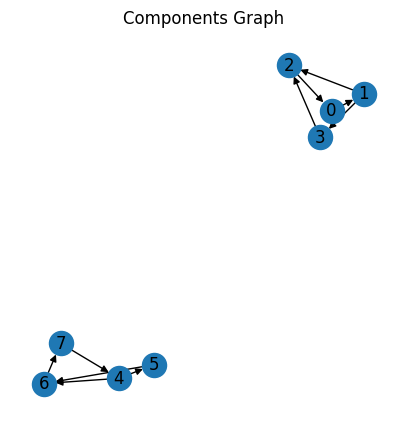

In [2]:
G_comp = nx.read_adjlist('../data/components.graph', create_using=nx.DiGraph())
plt.figure(figsize=(5, 5))
plt.title('Components Graph')
nx.draw(G_comp, with_labels=True)
plt.show()

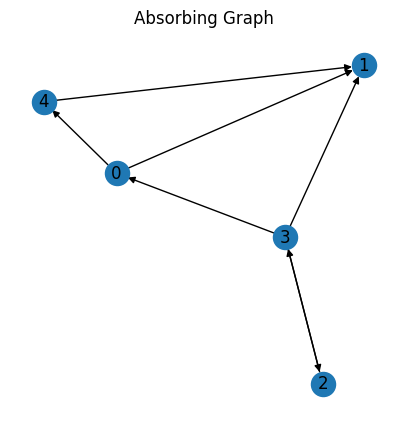

In [34]:
G_absorb = nx.read_adjlist('../data/absorbing.graph', create_using=nx.DiGraph())
plt.figure(figsize=(5, 5))
plt.title('Absorbing Graph')
nx.draw(G_absorb, with_labels=True)
plt.show()

#### Implementation of the Random Surfer model and some utilities functions

In [35]:
def surf(G, currentNode, ranks, maxIter=2000, counter=0):
    """
    Implements the random surfer model.

    Parameters:
        G (nx.DiGraph): The graph to perform random surfer on
        currentNode (int): The current node the random surfer is on
        ranks (dict): A dictionary mapping each node to the number of times it has been visited
        maxIter (int): The maximum number of iterations to perform
        counter (int): Counts the number of iterations performed
    """
    if counter == maxIter:
        return 
        
    ranks[currentNode] += 1
    counter += 1
    try:
        nextNode = random.choice(list(G.neighbors(currentNode)))
    except IndexError:
        print(f'Stuck at node {currentNode} after {counter} iterations')
        return

    surf(G, nextNode, ranks, maxIter, counter)

In [36]:
def pageRankScores(ranks):
    """
    Computes the Page Rank scores given the number of times each node was visited.

    Parameter:
        ranks (dict): Maps each node to the number of times it was visited

    Returns:
       pageRankScores (dict): Maps each nodes to its Page Rank score 
    """
    N = np.sum(list(ranks.values()))
    scores = {node: rank/N for node, rank in ranks.items()}
    
    return scores

In [37]:
def computeScores(G, N=10, fileName='test'):
    """
    Computes the Page Rank scores using the random surfer model for several iterations.

    Parameters:
        G (nx.DiGraph): The graph to perform random surfer on
        N (int): The number of iterations to perform
        fileName (str): The name of the file to write the results to without the extension
    """
    for i in range(N):
        ranks = {node : 0 for node in G.nodes()}
        startingNode = random.choice(list(G.nodes()))
        with open(f'./scores/{fileName}.txt', 'a') as f:
            f.write(f':::::Surf number {i+1}:::::\n\n')
            surf(G, startingNode, ranks)
            scores = pageRankScores(ranks)

            f.write(f'Initial website: {startingNode}\n')
            f.write(f'Number of visits of each website: {ranks}\n')
            f.write(f'Page Rank scores: {scores}\n')
            f.write('\n\n----------------------------------------\n\n')
        

#### Testing on `components.graph`

In [38]:
computeScores(G_comp, fileName='components')

#### Observations on `component.graph` (see [output file](./scores/components.txt))

This graph consists of 2 components hence the set of nodes that can be visited fully depend on the initial node. As we can see we alaways one half of the nodes that have a score of $0$ because it is impossible to reach them if they are not part of the component of the initial node.

We also see that whenever we reach node 6, we have to go to node 7. Hence they always have the same score. Also, the node 4 is at the "center" of this component. By this we mean that any path starting from node 4 will end to this node. So this is always the one with the highest score.

For the second component node 3 is more "isolated" hence it always gets the lowest score as it is harder to reach it and nodes 0 and 2 have the same behavior as nodes 6 and 7 in the first component.

#### Testing on `absorbing.graph`

In [39]:
computeScores(G_absorb, fileName='absorbing')

Stuck at node 1 after 1 iterations
Stuck at node 1 after 3 iterations
Stuck at node 1 after 2 iterations
Stuck at node 1 after 3 iterations
Stuck at node 1 after 9 iterations
Stuck at node 1 after 1 iterations
Stuck at node 1 after 2 iterations
Stuck at node 1 after 3 iterations
Stuck at node 1 after 2 iterations
Stuck at node 1 after 2 iterations


#### Observations on `absorbing.graph` (see [output file](./scores/absorbing.txt))

Here we can clearly see that once we reach node 1 we are stuck because it has no outgoing edge.

#### Exercise 2.13

In [40]:
def surf(G, currentNode, ranks, maxIter=2000, counter=0, dampingFactor=0.15):
    """
    Implements the random surfer model. At each iteration there is a probability to jump to a 
    random node. If we are stuck at a node (0-degree node), we jump to a random node.

    Parameters:
        G (nx.DiGraph): The graph to perform random surfer on
        currentNode (int): The current node the random surfer is on
        ranks (dict): A dictionary mapping each node to the number of times it has been visited
        maxIter (int): The maximum number of iterations to perform
        counter (int): Counts the number of iterations performed
        dampingFactor (float): The probability of jumping to a random node
    """
    if counter == maxIter:
        return 
        
    ranks[currentNode] += 1
    counter += 1
    try:
        nextNode = random.choice(list(G.neighbors(currentNode)))
    except IndexError:
        nextNode = random.choice(list(G.nodes()))

    if random.random() <= dampingFactor:
        nextNode = random.choice(list(G.nodes()))

    surf(G, nextNode, ranks, maxIter, counter)

#### Testing the new Random Surfer on `component.graph`

In [41]:
computeScores(G_comp, fileName='components_damping')

#### Observation of the new model on `component.graph` (see [output file](./scores/components_damping.txt))

We are no longer stuck into a component. This makes more sense because a surfer not only clicks on links on the page he currently is but can also open a new tab and go to the "other component". However, it does not seem now that the node in the component of the initial node have a higher probability to be visited which might not be correct since the surfer is still more likely to click on links on his current page rather than opening new tabs.

#### Testing the new model on `absorbing.graph`

In [42]:
computeScores(G_absorb, fileName='absorbing_damping')

#### Observations of the new model on `absorbing.graph` (see [output file](./scores/absorbing_damping.txt))

We are no longer stuck at node 1. This makes sense because the surfer is likely to open a new tab once he is done with this page where he is stuck.

---

### 2.4.2 Power Iteration Method

#### Exercise 2.14: Power Iteration method

In [13]:
G = nx.read_adjlist('../data/wikipedia.graph', create_using=nx.DiGraph())
N = len(G.nodes())

In [58]:
def buildTransitionMatrix(G):
    """
    Builds the transition matrix of the graph G.

    Parameter:
        G (nx.DiGraph): The graph to build the transition matrix of

    Returns:
        H (np.array): The transition matrix of G
    """
    H = np.zeros((N, N))
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        for neighbor in neighbors:
            H[int(node), int(neighbor)] = 1/len(neighbors)
    
    return H

In [59]:
def handleDanglingNode(G):
    """
    Handles the dangling nodes by jumping to a random node with probability 1/N.

    Parameter:
        G (nx.DiGraph): The graph

    Returns:
        H_hat (np.array): The transition matrix of the graph with the dangling nodes handled
    """
    H = buildTransitionMatrix(G)
    w = np.reshape([1 if len(list(G.neighbors(node))) == 0 else 0 for node in G.nodes()], (N, 1))
    H_hat = H + 1/N * w
    
    return H_hat

In [63]:
def createGoogleMatrix(G, theta=0.85):
    """
    Handles the random restarts by jumping to a random node with probability theta.

    Parameters:
        G (nx.DiGraph): The graph
        theta (float): The probability of jumping to a random node

    Returns:
        GMatrix (np.array): The transition matrix of the graph with the random restarts handled
    """
    H = buildTransitionMatrix(G)
    H_hat = handleDanglingNode(G)
    GMatrix = theta * H_hat + (1-theta) * np.ones((N, N))/N
    
    return GMatrix

In [64]:
def powerIteration(threshold=1e-5, maxIter=1000):
    """
    Performs the power iteration algorithm to compute the Page Rank scores.

    Parameters:
        threshold (float): The threshold to stop the algorithm
        maxIter (int): The maximum number of iterations to perform

    Returns:
        next_sol (dict): Maps each node to its Page Rank score
    """
    GMatrix = createGoogleMatrix(G)
    curr_sol = np.ones(N)/N
    next_sol = np.dot(GMatrix, curr_sol)
    
    while abs(np.linalg.norm(curr_sol - next_sol)) > threshold:
        curr_sol = next_sol
        next_sol = np.dot(GMatrix, curr_sol)
    
    return next_sol

In [65]:
pi = powerIteration()
pi

array([0.0001806 , 0.0001806 , 0.00018072, ..., 0.00018054, 0.00018078,
       0.00018064])

---

### 2.4.3 Gaming the system *(Bonus)*

#### Exercise 2.15 *(Bonus)*